In [64]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from scipy.stats import zscore
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
zoo = pd.read_csv('Zoo.csv')
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
zoo.describe().T

,count,mean,std,min,25%,50%,75%,max
hair,101.0,0.425743,0.496921,0.0,0.0,0.0,1.0,1.0
feathers,101.0,0.198020,0.400495,0.0,0.0,0.0,0.0,1.0
eggs,101.0,0.584158,0.495325,0.0,0.0,1.0,1.0,1.0
milk,101.0,0.405941,0.493522,0.0,0.0,0.0,1.0,1.0
airborne,101.0,0.237624,0.427750,0.0,0.0,0.0,0.0,1.0
aquatic,101.0,0.356436,0.481335,0.0,0.0,0.0,1.0,1.0
predator,101.0,0.554455,0.499505,0.0,0.0,1.0,1.0,1.0
toothed,101.0,0.603960,0.491512,0.0,0.0,1.0,1.0,1.0
backbone,101.0,0.821782,0.384605,0.0,1.0,1.0,1.0,1.0
breathes,101.0,0.792079,0.407844,0.0,1.0,1.0,1.0,1.0


In [5]:
zoo.corr()

C:\Users\Anup0\AppData\Local\Temp\ipykernel_8528\2190556807.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  zoo.corr()


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


C:\Users\Anup0\AppData\Local\Temp\ipykernel_8528\2289588409.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(zoo.corr(),vmax=1,vmin=-1,annot=True,cmap='PuBu')


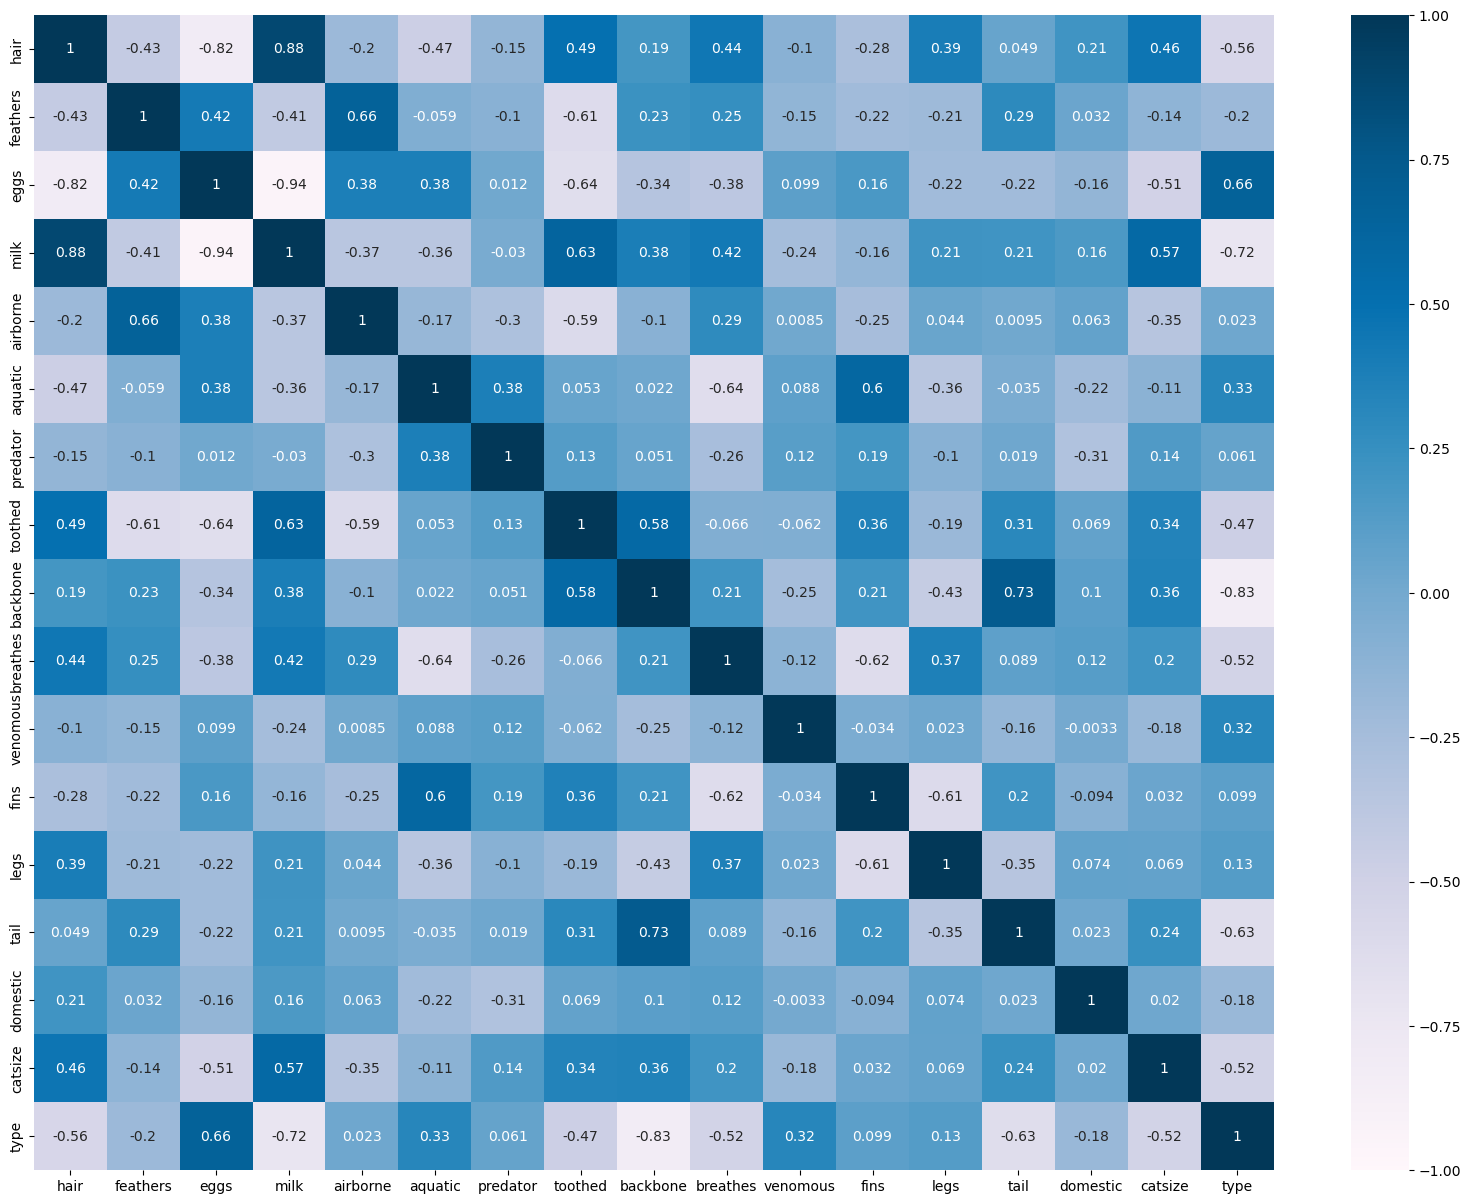

In [8]:
plt.figure(figsize=(20,15))
sns.heatmap(zoo.corr(),vmax=1,vmin=-1,annot=True,cmap='PuBu')
plt.show()

In [10]:
zoo.type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [11]:
zoo['animal name'].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [15]:
zoo.shape

(101, 18)

In [16]:
zoo1=zoo.iloc[:,1:]
zoo1.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


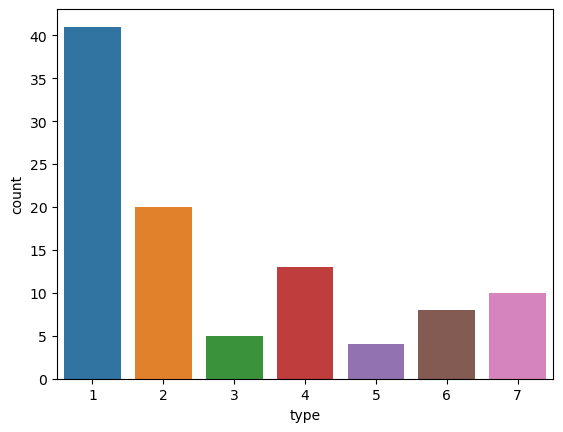

In [17]:
# Checking for class imbalance:
sns.countplot(x = 'type',data = zoo1)
plt.show()

Histogram of :  hair


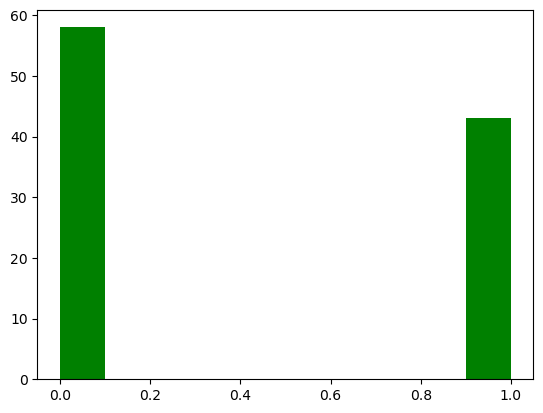

Histogram of :  feathers


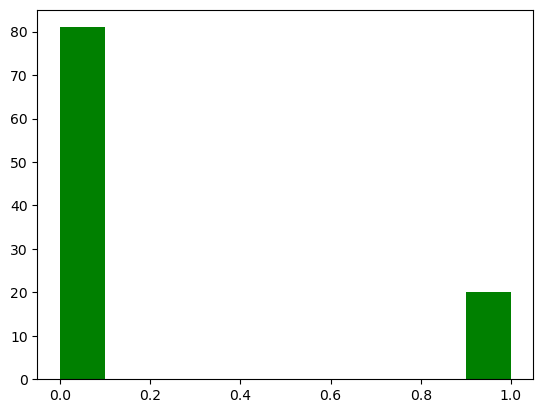

Histogram of :  eggs


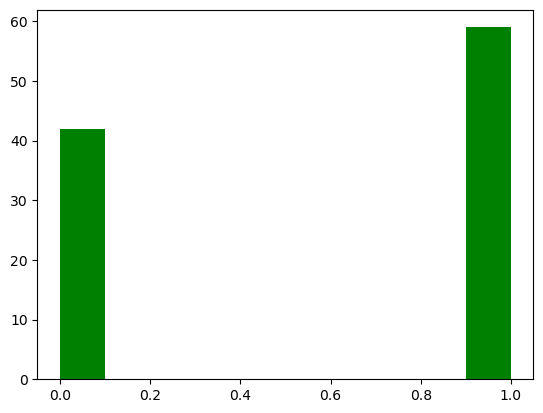

Histogram of :  milk


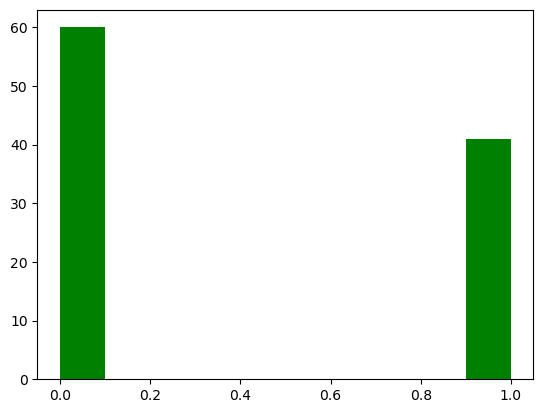

Histogram of :  airborne


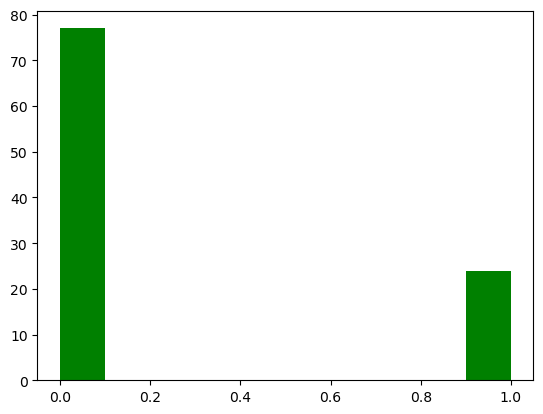

Histogram of :  aquatic


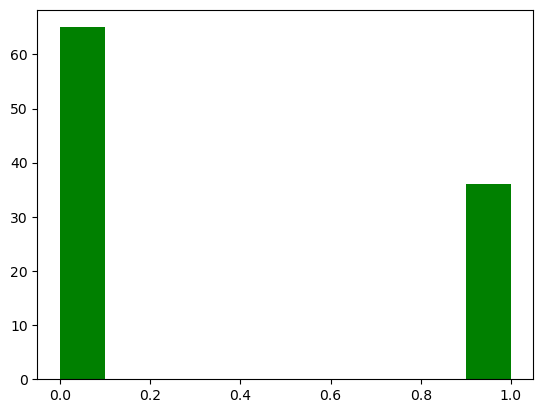

Histogram of :  predator


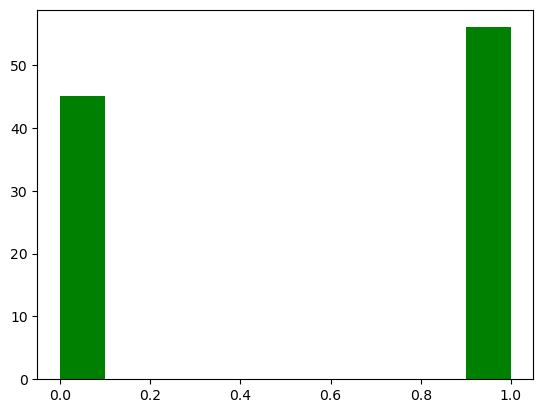

Histogram of :  toothed


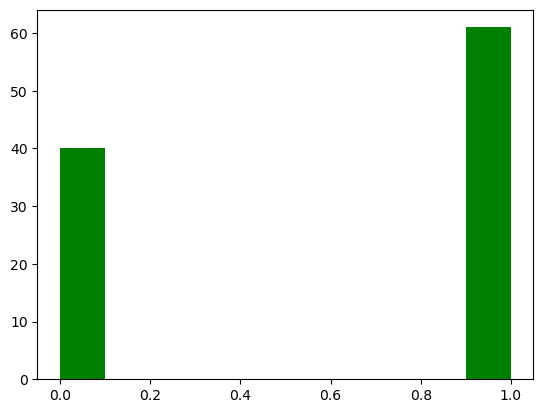

Histogram of :  backbone


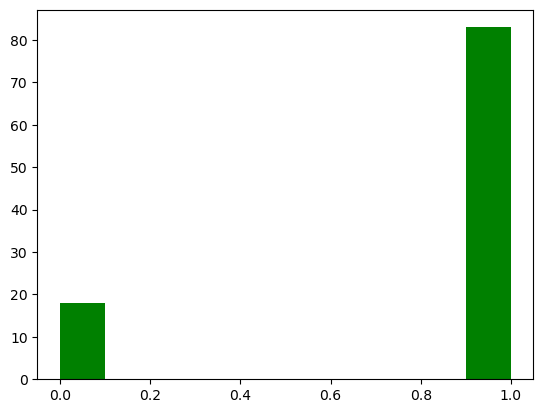

Histogram of :  breathes


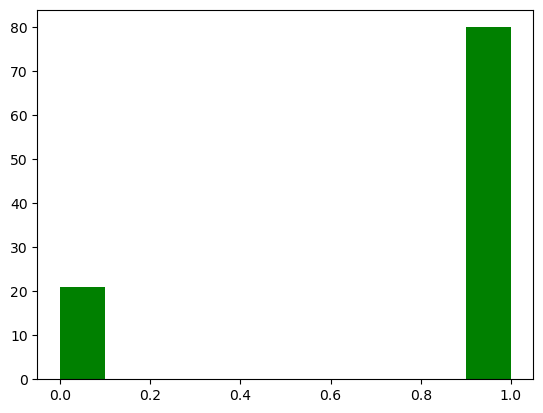

Histogram of :  venomous


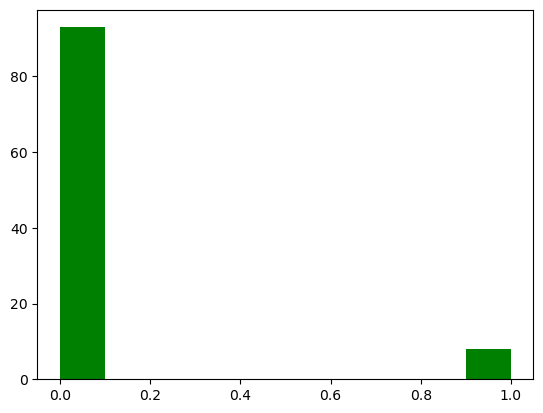

Histogram of :  fins


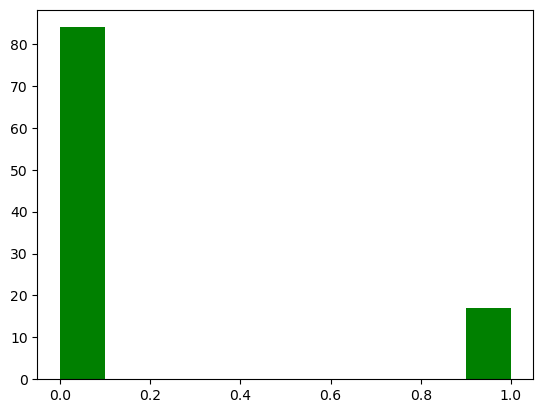

Histogram of :  legs


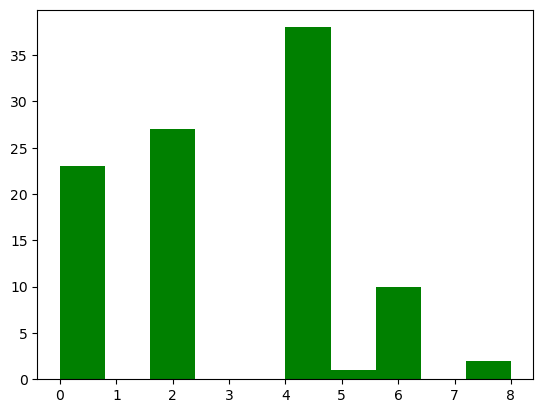

Histogram of :  tail


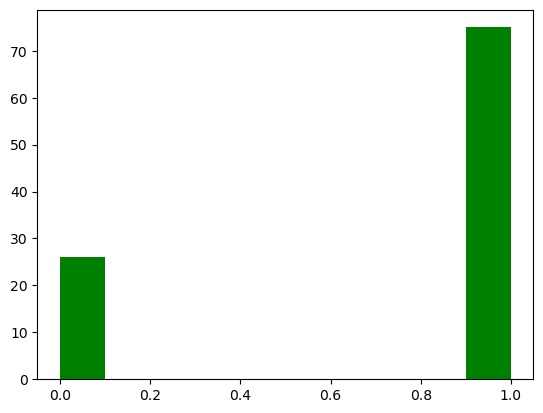

Histogram of :  domestic


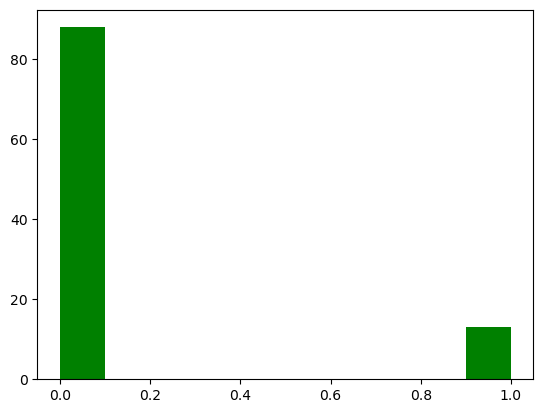

Histogram of :  catsize


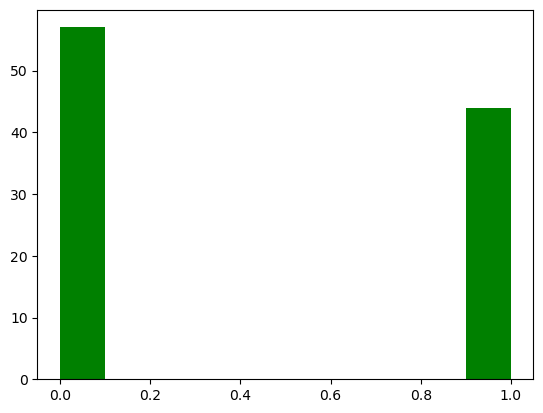

Histogram of :  type


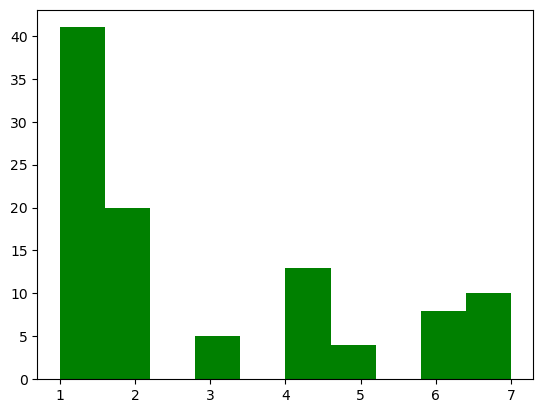

In [19]:
for i in zoo1.columns:
    print('Histogram of : ',i)
    plt.hist(zoo1[i],color='Green')
    plt.show()

<Figure size 3000x3000 with 0 Axes>

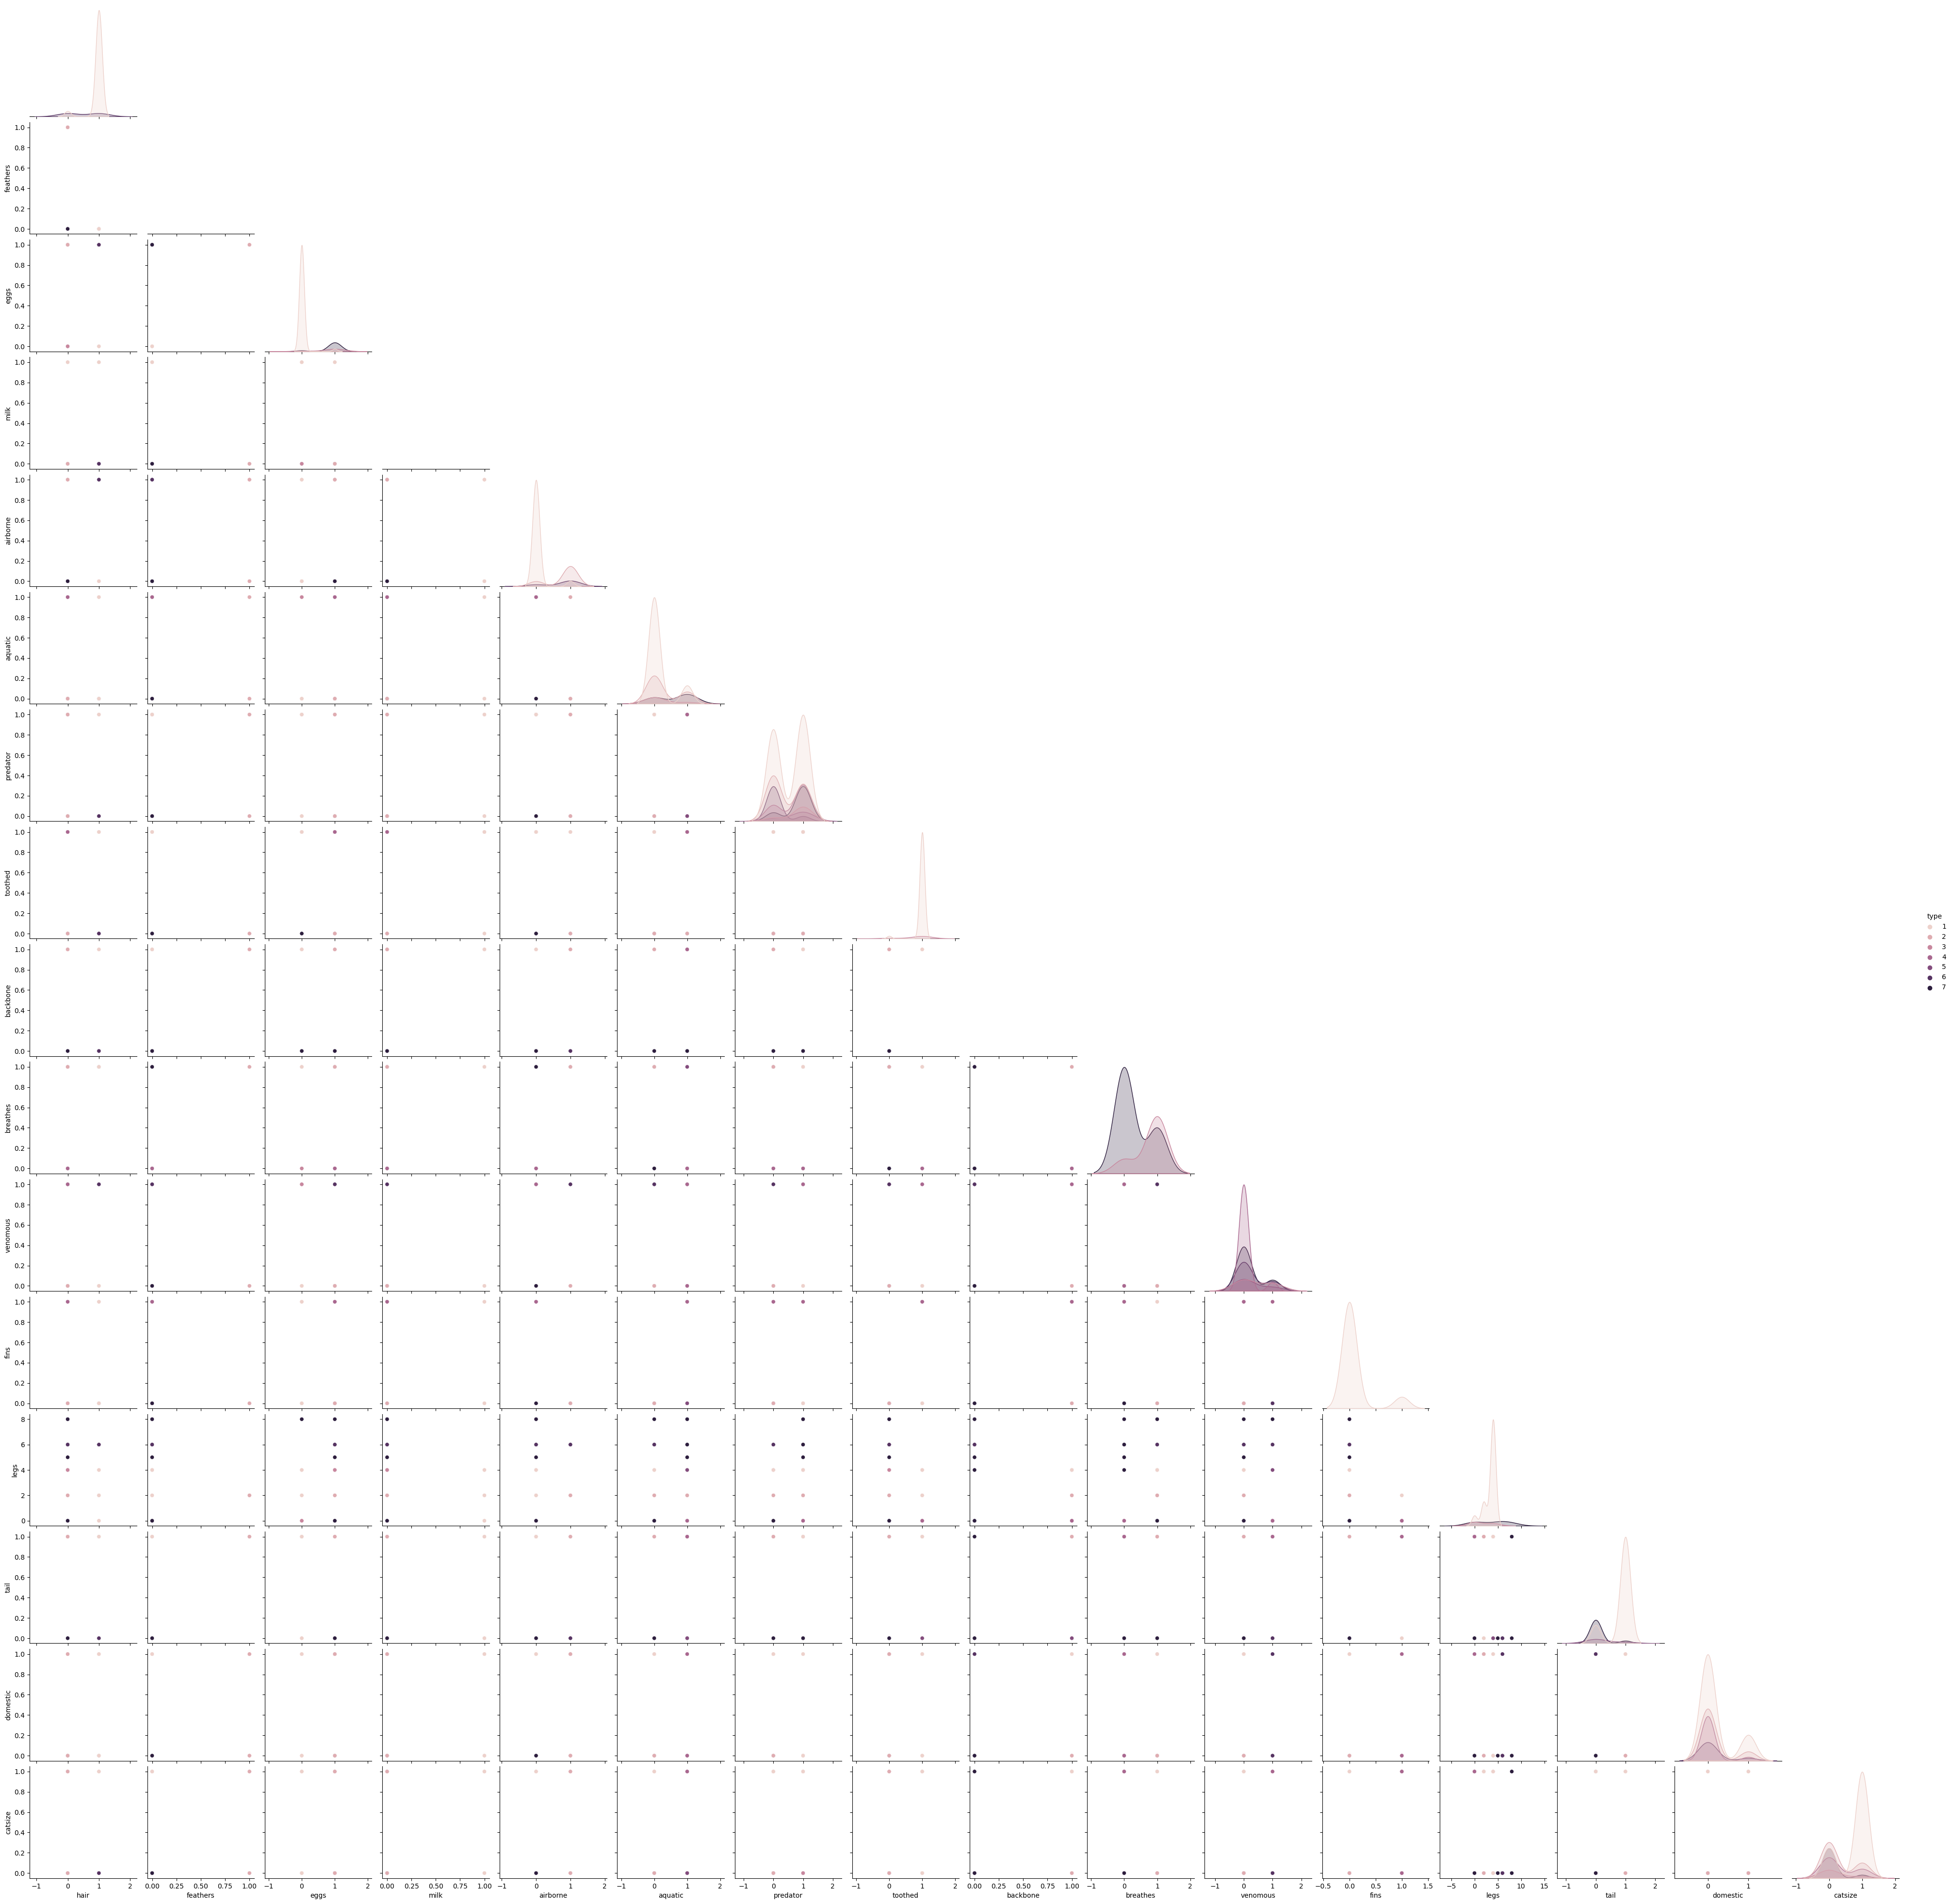

In [23]:
# Plotting pairlot to check all the features at once:
plt.figure(figsize=(30,30))
sns.pairplot(zoo1,corner=True,diag_kind='kde',hue = 'type')
plt.show()

In [24]:
# Splitting data into features and target:
X = zoo1.iloc[:,:-1]
y = zoo1.iloc[:,-1]

In [35]:
# Splitting the data into train and test:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

#### Build kNN Model

In [36]:
NNH = KNeighborsClassifier(n_neighbors=3,weights='distance')
NNH.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

#### Evaluate performace of kNN Model

In [37]:
y_train_pred = NNH.predict(X_train)

In [38]:
accuracy_score(y_train,y_train_pred)

1.0

In [39]:
y_test_pred = NNH.predict(X_test)

In [40]:
accuracy_score(y_test,y_test_pred)

0.9615384615384616

In [41]:
#Let's check confusion matrix:
cm = confusion_matrix(y_test,y_test_pred)
cm

array([[13,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  2]], dtype=int64)

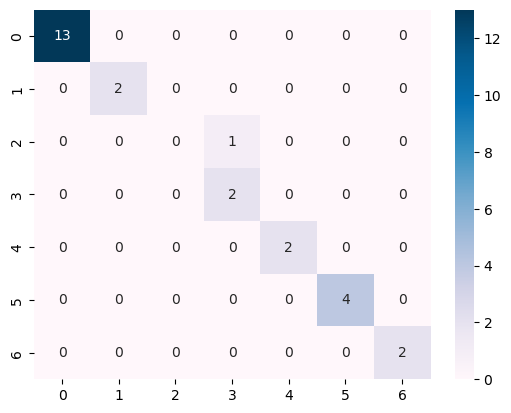

In [42]:
sns.heatmap(cm,annot=True,cmap='PuBu')
plt.show()

#### Choosing best K value:

In [43]:
train_scores = []
test_scores = []
for k in range(1,15):
    NNH = KNeighborsClassifier(n_neighbors=k,weights='distance')
    NNH.fit(X_train,y_train)
    train_scores.append(NNH.score(X_train,y_train))
    test_scores.append(NNH.score(X_test,y_test))

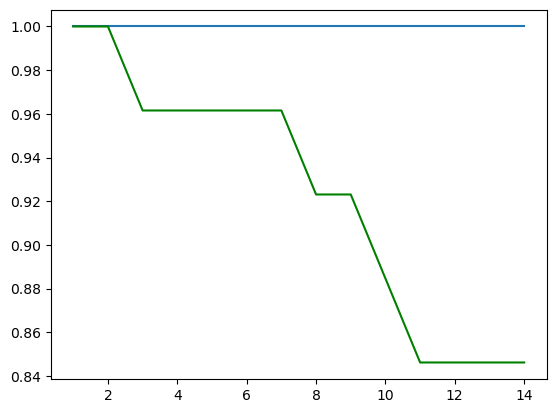

In [44]:
plt.plot(range(1,15),train_scores)
plt.plot(range(1,15),test_scores,color = 'green')
plt.show()

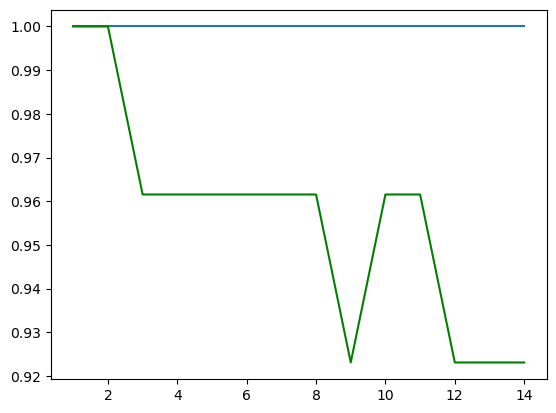

In [57]:
# Let's try with weights = 'distance' and metric =cityblock
train_scores = []
test_scores = []
for k in range(1,15):
    NNH = KNeighborsClassifier(n_neighbors=k,weights='distance',metric='cityblock')
    NNH.fit(X_train,y_train)
    train_scores.append(NNH.score(X_train,y_train))
    test_scores.append(NNH.score(X_test,y_test))
plt.plot(range(1,15),train_scores)
plt.plot(range(1,15),test_scores,color = 'green')
plt.show()


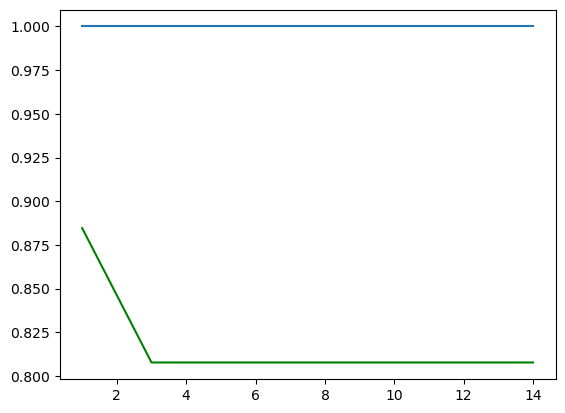

In [58]:
# Let's try with weights = 'distance' and metric =chebyshev
train_scores = []
test_scores = []
for k in range(1,15):
    NNH = KNeighborsClassifier(n_neighbors=k,weights='distance',metric='chebyshev')
    NNH.fit(X_train,y_train)
    train_scores.append(NNH.score(X_train,y_train))
    test_scores.append(NNH.score(X_test,y_test))
plt.plot(range(1,15),train_scores)
plt.plot(range(1,15),test_scores,color = 'green')
plt.show()


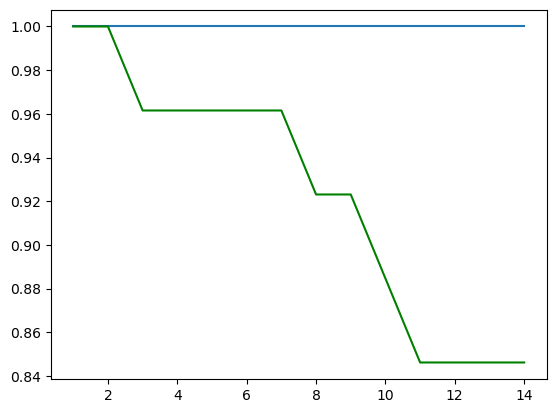

In [59]:
# Let's try with weights = 'distance' and metric =euclidean
train_scores = []
test_scores = []
for k in range(1,15):
    NNH = KNeighborsClassifier(n_neighbors=k,weights='distance',metric='euclidean')
    NNH.fit(X_train,y_train)
    train_scores.append(NNH.score(X_train,y_train))
    test_scores.append(NNH.score(X_test,y_test))
plt.plot(range(1,15),train_scores)
plt.plot(range(1,15),test_scores,color = 'green')
plt.show()


In [45]:
# Let's try with weights = 'uniform'
train_scores = []
test_scores = []
for k in range(1,15):
    NNH = KNeighborsClassifier(n_neighbors=k,weights='uniform')
    NNH.fit(X_train,y_train)
    train_scores.append(NNH.score(X_train,y_train))
    test_scores.append(NNH.score(X_test,y_test))

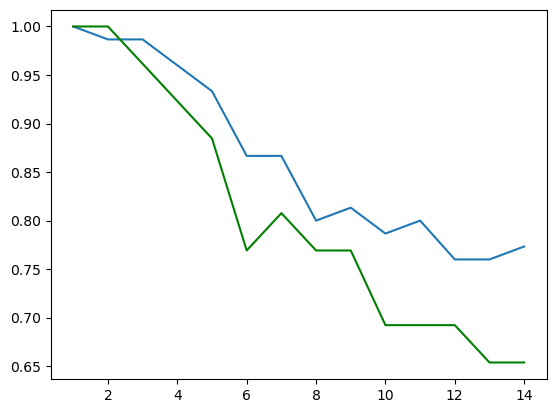

In [46]:
plt.plot(range(1,15),train_scores)
plt.plot(range(1,15),test_scores,color = 'green')
plt.show()

In [47]:
# K = 3 with weights = uniform, looks a good option:
NNH = KNeighborsClassifier(n_neighbors=3,weights='uniform')
NNH.fit(X_train,y_train)
y_train_pred = NNH.predict(X_train)
print('Accuracy score for train dataset is : ',accuracy_score(y_train,y_train_pred))
y_test_pred = NNH.predict(X_test)
print('Accuracy score for test dataset is : ',accuracy_score(y_test,y_test_pred))

Accuracy score for train dataset is :  0.9866666666666667
Accuracy score for test dataset is :  0.9615384615384616


In [48]:
#Let's check confusion matrix:
cm = confusion_matrix(y_test,y_test_pred)
cm

array([[13,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  2]], dtype=int64)

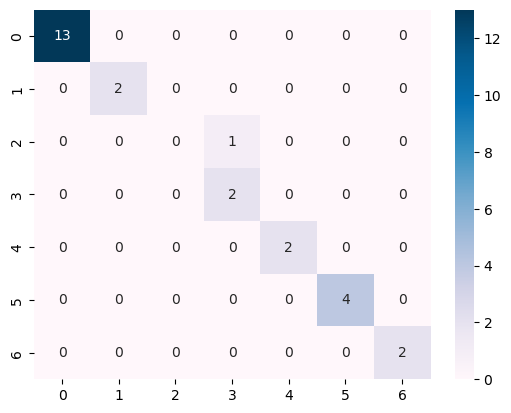

In [49]:
sns.heatmap(cm,annot=True,cmap='PuBu')
plt.show()

In [50]:
classification_report(y_test,y_test_pred,output_dict=True)

C:\Users\Anup0\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anup0\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anup0\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 13},
 '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2},
 '3': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1},
 '4': {'precision': 0.6666666666666666,
  'recall': 1.0,
  'f1-score': 0.8,
  'support': 2},
 '5': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2},
 '6': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4},
 '7': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2},
 'accuracy': 0.9615384615384616,
 'macro avg': {'precision': 0.8095238095238094,
  'recall': 0.8571428571428571,
  'f1-score': 0.8285714285714285,
  'support': 26},
 'weighted avg': {'precision': 0.9358974358974359,
  'recall': 0.9615384615384616,
  'f1-score': 0.9461538461538462,
  'support': 26}}

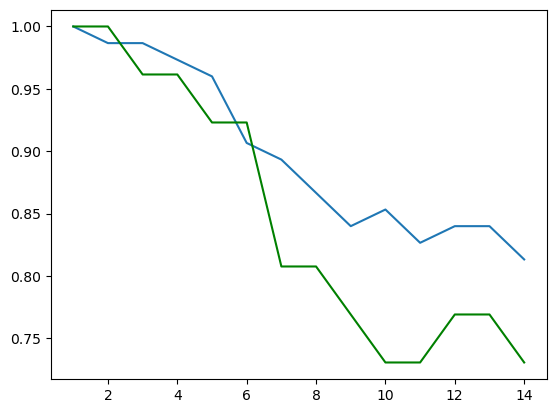

In [54]:
# Let's try with weights = 'uniform' and metric =cityblock
train_scores = []
test_scores = []
for k in range(1,15):
    NNH = KNeighborsClassifier(n_neighbors=k,weights='uniform',metric='cityblock')
    NNH.fit(X_train,y_train)
    train_scores.append(NNH.score(X_train,y_train))
    test_scores.append(NNH.score(X_test,y_test))
plt.plot(range(1,15),train_scores)
plt.plot(range(1,15),test_scores,color = 'green')
plt.show()


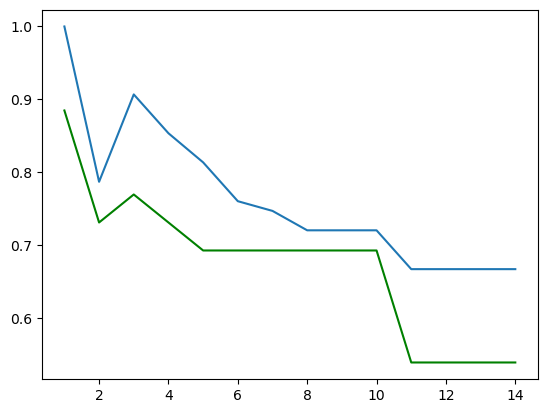

In [55]:
# Let's try with weights = 'uniform' and metric =chebyshev
train_scores = []
test_scores = []
for k in range(1,15):
    NNH = KNeighborsClassifier(n_neighbors=k,weights='uniform',metric='chebyshev')
    NNH.fit(X_train,y_train)
    train_scores.append(NNH.score(X_train,y_train))
    test_scores.append(NNH.score(X_test,y_test))
plt.plot(range(1,15),train_scores)
plt.plot(range(1,15),test_scores,color = 'green')
plt.show()


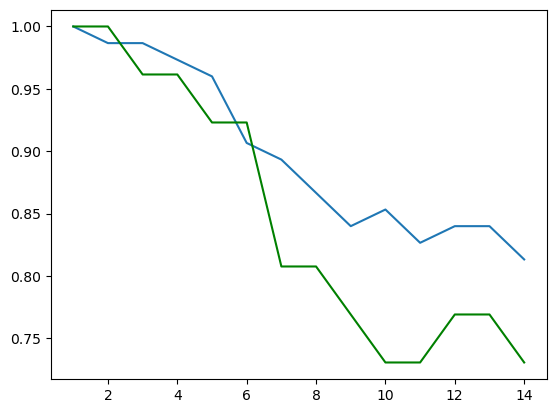

In [63]:
# Let's try with weights = 'uniform' and metric =cityblock
train_scores = []
test_scores = []
for k in range(1,15):
    NNH = KNeighborsClassifier(n_neighbors=k,weights='uniform',metric='cityblock')
    NNH.fit(X_train,y_train)
    train_scores.append(NNH.score(X_train,y_train))
    test_scores.append(NNH.score(X_test,y_test))
plt.plot(range(1,15),train_scores)
plt.plot(range(1,15),test_scores,color = 'green')
plt.show()


In [68]:
#Let's try Grid Search:
n_neighbors = np.arange(1,20)
params = {'n_neighbors':np.arange(3,15),
          'weights':['uniform','distance'],
          'metric':['cityblock','chebyshev','euclidean','correlation','minkowski'],
         }
model = KNeighborsClassifier()
inner_cv = KFold(n_splits=2,shuffle=True,random_state=42)
outer_cv = KFold(n_splits=5,shuffle=True,random_state=42)
grid = GridSearchCV(estimator=model, param_grid=params,n_jobs=-1,verbose=1,scoring='accuracy',cv=inner_cv)
grid.fit(X, y)
model_best = grid.best_estimator_
total_score = cross_val_score(grid,X=X,y=y,cv=outer_cv)
print('Total_Scores           :', np.round(total_score*100),2)
print('Best Score             :', grid.best_score_)
print('RF Best Model          :', model_best)


Fitting 2 folds for each of 120 candidates, totalling 240 fits
Fitting 2 folds for each of 120 candidates, totalling 240 fits
Fitting 2 folds for each of 120 candidates, totalling 240 fits
Fitting 2 folds for each of 120 candidates, totalling 240 fits
Fitting 2 folds for each of 120 candidates, totalling 240 fits
Fitting 2 folds for each of 120 candidates, totalling 240 fits
Total_Scores           : [ 95.  90. 100.  95. 100.] 2
Best Score             : 0.9505882352941176
RF Best Model          : KNeighborsClassifier(metric='cityblock', n_neighbors=3, weights='distance')
